In [1]:
# import libraries 
import pandas as pd 
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder


In [3]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
data =pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [6]:
data.shape

(374, 13)

In [7]:
data.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
print(data.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [10]:
print(data['Sleep Disorder'].unique())

[nan 'Sleep Apnea' 'Insomnia']


In [11]:
print(data['Sleep Disorder'].value_counts())


Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [12]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

In [13]:
print(data['Sleep Disorder'].value_counts())


Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [14]:
data.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [16]:
data["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
369    Female
370    Female
371    Female
372    Female
373    Female
Name: Gender, Length: 374, dtype: object

In [17]:
# encoding categories
 
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

data['BMI Category'] = data['BMI Category'].map({'Underweight':0,'Normal':1,'Overweight':2,'Obese':3})

data['Sleep Disorder'] = data['Sleep Disorder'].map({'No Disorder':0, 'Sleep Apnea':1, 'Insomnia':2})


In [18]:
# Encode Occupation using LabelEncoder

le = LabelEncoder()
data["Occupation"] = le.fit_transform(data["Occupation"])

In [19]:
data[['BP_Systolic', 'BP_Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)
data['BP_Systolic'] = data['BP_Systolic'].astype(float)
data['BP_Diastolic'] = data['BP_Diastolic'].astype(float)


In [20]:
data = data.drop('Blood Pressure', axis=1)


In [21]:
data = data.drop('Person ID', axis=1)


In [22]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Systolic,BP_Diastolic
0,0,27,9,6.1,6,42,6,2,77,4200,0,126.0,83.0
1,0,28,1,6.2,6,60,8,1,75,10000,0,125.0,80.0
2,0,28,1,6.2,6,60,8,1,75,10000,0,125.0,80.0
3,0,28,6,5.9,4,30,8,3,85,3000,1,140.0,90.0
4,0,28,6,5.9,4,30,8,3,85,3000,1,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,5,8.1,9,75,3,2,68,7000,1,140.0,95.0
370,1,59,5,8.0,9,75,3,2,68,7000,1,140.0,95.0
371,1,59,5,8.1,9,75,3,2,68,7000,1,140.0,95.0
372,1,59,5,8.1,9,75,3,2,68,7000,1,140.0,95.0


In [23]:
print(data.isnull().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BP_Systolic                0
BP_Diastolic               0
dtype: int64


In [24]:
data["BMI Category"].unique()


array([2, 1, 3])

In [25]:
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']


In [26]:
print(y.value_counts())

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


Sleep Disorder
0    219
1     78
2     77
Name: count, dtype: int64


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [28]:
print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (525, 12)
Testing Data Shape: (132, 12)


# Random Forest Classifier 

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rfc = rf_model.predict(X_test)


In [30]:
# Accuracy
acc_rfc=accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier -- Accuracy:", acc_rfc)

# Classification report
print(classification_report(y_test, y_pred_rfc))


Random Forest Classifier -- Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.90      0.95      0.92        38
           2       0.95      0.83      0.89        42

    accuracy                           0.92       132
   macro avg       0.92      0.91      0.91       132
weighted avg       0.92      0.92      0.92       132



C:\Users\kumbh\AppData\Local\Temp\ipykernel_22792\387448307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')


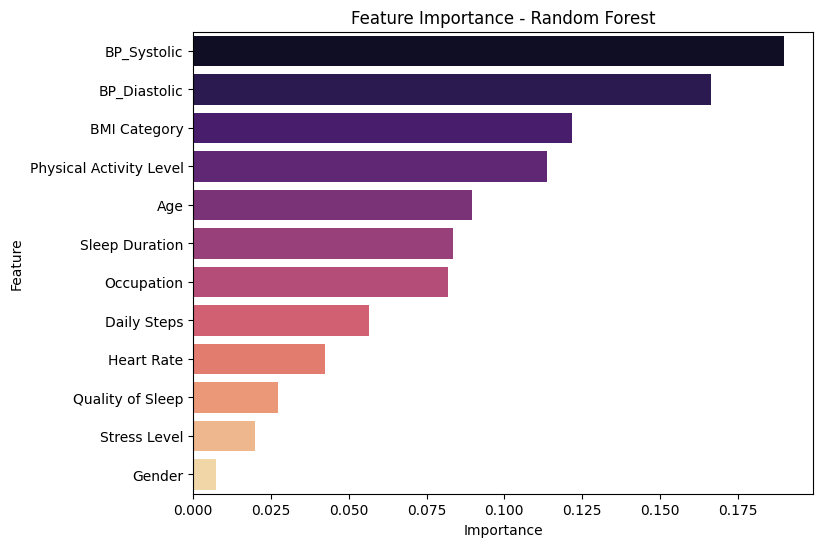

In [31]:
# --- Feature Importance (for tree-based models) ---
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')
plt.title("Feature Importance - Random Forest")
plt.show()

# Logistic Regression


In [32]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log=accuracy_score(y_test, y_pred_log)
print("Logistic Regression -- Accuracy:", acc_log)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))


Logistic Regression -- Accuracy: 0.8787878787878788

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        52
           1       0.95      0.92      0.93        38
           2       0.83      0.90      0.86        42

    accuracy                           0.88       132
   macro avg       0.88      0.88      0.88       132
weighted avg       0.88      0.88      0.88       132



C:\Users\kumbh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree


In [33]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt =accuracy_score(y_test, y_pred_dt)
print("Decision Tree -- Accuracy:", acc_dt)

print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

Decision Tree -- Accuracy: 0.9242424242424242

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.92      0.95      0.94        38
           2       0.93      0.88      0.90        42

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.92      0.92      0.92       132



In [34]:
# comparing model performance 

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [acc_log, acc_dt, acc_rfc]
})

print("\n Model Accuracy Comparison:\n")
print(results.to_string(index=False))



 Model Accuracy Comparison:

              Model  Accuracy
Logistic Regression  0.878788
      Decision Tree  0.924242
      Random Forest  0.916667


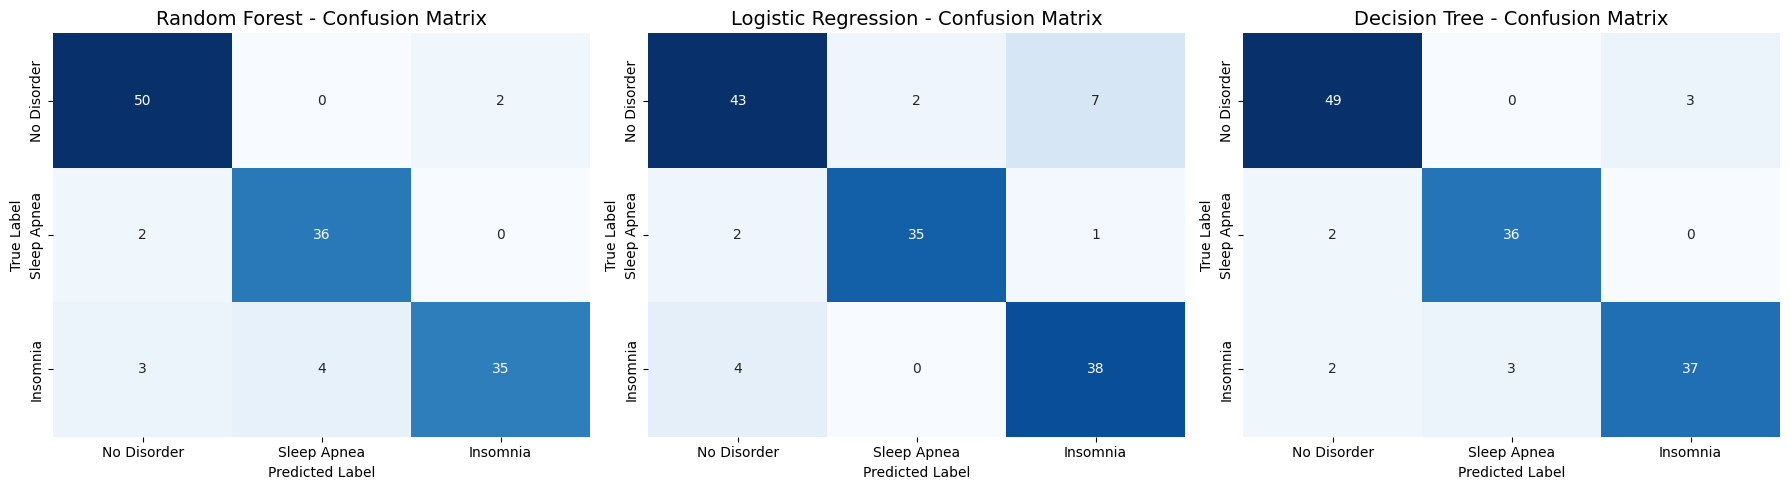

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Order: Random Forest, Logistic Regression, Decision Tree
model_preds = [y_pred_rfc, y_pred_log, y_pred_dt]
titles = ["Random Forest", "Logistic Regression", "Decision Tree"]

for ax, y_pred, title in zip(axes, model_preds, titles):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False,
                xticklabels=["No Disorder", "Sleep Apnea", "Insomnia"],
                yticklabels=["No Disorder", "Sleep Apnea", "Insomnia"])
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"{title} - Confusion Matrix", fontsize=14)

plt.tight_layout()
plt.show()


In [36]:
best_model_name = results.loc[results["Accuracy"].idxmax(), "Model"]
print(f"\n✅ Best Performing Model: {best_model_name}")


✅ Best Performing Model: Decision Tree
